In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

In [ ]:
df = pd.read_csv("../Results/result.csv", parse_dates=["Index"], index_col=["Index"])
df.tail()

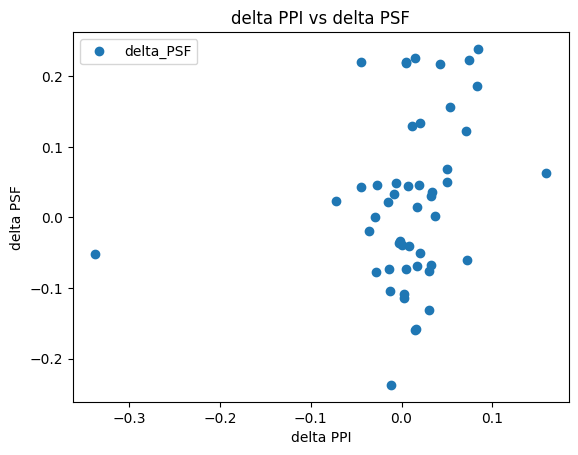

In [3]:
df.plot(x='delta_PPI', y='delta_PSF', style='o')  
plt.title('delta PPI vs delta PSF')  
plt.xlabel('delta PPI')  
plt.ylabel('delta PSF')  
plt.show()

In [4]:
X_cols = ['delta_PPI', 'No. of Transactions']
X = df[X_cols].dropna().values.reshape(-1,len(X_cols))
y = df['delta_PSF'].dropna().values.reshape(-1,1)

In [5]:
X

array([[ 1.92893401e-02,  2.30000000e+01],
       [-2.68924303e-02,  5.00000000e+00],
       [-3.58239509e-02,  7.00000000e+00],
       [-4.45859873e-02,  4.00000000e+00],
       [-2.22222222e-03,  3.00000000e+00],
       [-2.78396437e-02,  3.00000000e+00],
       [-7.19512195e-02,  1.00000000e+00],
       [-1.22549020e-03,  1.00000000e+00],
       [-1.36476427e-02,  4.00000000e+00],
       [ 1.48514851e-02,  1.00000000e+00],
       [ 2.07570208e-02,  4.00000000e+00],
       [ 1.56438026e-02,  2.00000000e+00],
       [ 1.54028436e-02,  8.00000000e+00],
       [ 1.75029172e-02,  1.90000000e+01],
       [ 3.21100917e-02,  1.30000000e+01],
       [ 4.22222222e-02,  4.00000000e+00],
       [ 5.33049041e-02,  6.00000000e+00],
       [ 8.40080972e-02,  1.00000000e+00],
       [ 8.30999066e-02,  2.00000000e+00],
       [ 7.24137931e-02,  1.00000000e+00],
       [ 3.69774920e-02,  3.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [-3.37000000e-01,  1.00000000e+00],
       [ 1.

## Split test train with random splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[0.01676902]
[[0.39345037 0.0008954 ]]


In [9]:
y_pred = regressor.predict(X_test)

In [10]:
actual_predicted_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_predicted_df

,Actual,Predicted
0,0.129948,0.022187
1,-0.036559,0.018581
2,0.050812,0.039976
3,-0.114342,0.018782
4,0.220084,0.020505
5,-0.237430,0.014142
6,0.043949,0.020653
7,0.001041,0.007185
8,-0.033784,0.017182
9,0.134650,0.028517


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.0944550357551635
Mean Squared Error: 0.01500547760386611
Root Mean Squared Error: 0.12249684732214992
R Square Score: 0.04657742462041181


## Split test train by latest values

In [39]:
X_cols = ['delta_PPI', 'No. of Transactions']
X = df[X_cols].dropna().values.reshape(-1,len(X_cols))
y = df['delta_PSF'].dropna().values.reshape(-1,1)

In [13]:
test_len = round(len(X)*0.2)
test_len

10

In [14]:
X_test = X[-test_len:]
y_test = y[-test_len:]
X_test

array([[-0.01502146,  1.        ],
       [-0.0289103 ,  2.        ],
       [ 0.0052356 ,  1.        ],
       [ 0.00817844,  2.        ],
       [ 0.07415254,  2.        ],
       [-0.00613079,  1.        ],
       [ 0.03241053,  2.        ],
       [-0.01270053,  1.        ],
       [ 0.00470746,  1.        ],
       [ 0.03024194,  1.        ]])

In [15]:
X_train = X[:len(X)-test_len]
y_train = y[:len(X)-test_len]

len(y_train)

39

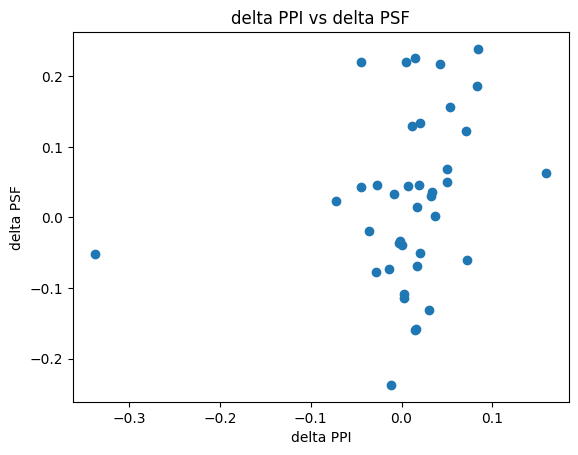

In [16]:
plt.scatter(X_train[:,0], y_train)
plt.title('delta PPI vs delta PSF')  
plt.xlabel('delta PPI')  
plt.ylabel('delta PSF') 
#plt.ylim([-200, 500])
#plt.xlim([-2, 8])
plt.show()

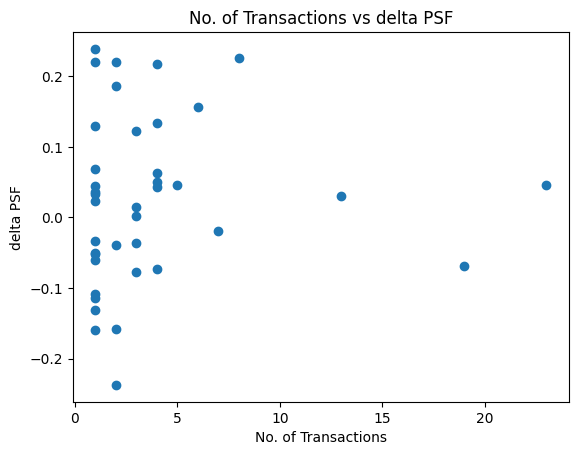

In [17]:
plt.scatter(X_train[:,1], y_train)
plt.title('No. of Transactions vs delta PSF')  
plt.xlabel('No. of Transactions')  
plt.ylabel('delta PSF') 
#plt.ylim([-200, 500])
#plt.xlim([-2, 8])
plt.show()

Remove outliers using Local Outlier Factor (k nearest neighbours)

# identify outliers in the training dataset
lof = LocalOutlierFactor(n_neighbors=8)
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

plt.scatter(X_train, y_train)
plt.title('delta PPI vs delta PSF with outliers removed')  
plt.xlabel('delta PPI')  
plt.ylabel('delta PSF') 
plt.ylim([-200, 400])
plt.xlim([-2, 8])
plt.show()

Removing outliers using IQR

# calculate interquartile range
q25, q75 = np.percentile(y_train, 25), np.percentile(y_train, 75)
iqr = q75 - q25
q25, q75

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
lower, upper

# remove outliers
mask = np.where(y_train < upper )[0]
mask = np.where(y_train > lower )[0]
mask

og_len = len(y_train)
X_train, y_train = X_train[mask, :], y_train[mask]
after_len = len(y_train)
outliers_removed = og_len-after_len
outliers_removed

Removing outliers using Z score

In [40]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(y_train))
print(z)

[[0.14205629]
 [0.13721191]
 [0.45126855]
 [0.11630745]
 [0.60518431]
 [0.9715015 ]
 [0.07035433]
 [0.58027948]
 [0.92660379]
 [1.71464775]
 [0.93117122]
 [1.69698637]
 [1.7554277 ]
 [0.89851842]
 [0.0023651 ]
 [1.67913189]
 [1.12778903]
 [1.86751775]
 [1.39362301]
 [0.82044657]
 [0.25992776]
 [0.62885479]
 [0.74780016]
 [0.29231114]
 [0.81783617]
 [0.3411256 ]
 [0.17884246]
 [0.04228979]
 [1.4584633 ]
 [0.88897583]
 [1.30317715]
 [1.24813859]
 [1.69781671]
 [0.14786962]
 [0.11725724]
 [0.73044626]
 [1.70612505]
 [0.02528735]]


In [41]:
threshold = 3
 
# Position of the outlier
mask = np.where(z < threshold)[0]
mask 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [42]:
og_len = len(y_train)

In [43]:
X_train, y_train = X_train[mask, :], y_train[mask,:]
after_len = len(y_train)
outliers_removed = og_len-after_len
outliers_removed

0

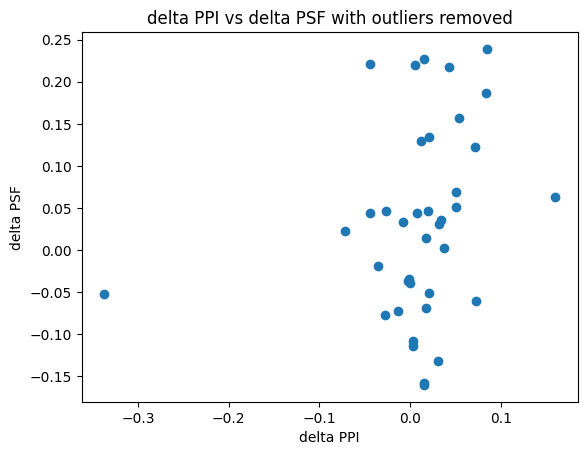

In [44]:
plt.scatter(X_train[:,0], y_train)
plt.title('delta PPI vs delta PSF with outliers removed')  
plt.xlabel('delta PPI')  
plt.ylabel('delta PSF') 
#plt.ylim([-200, 450])
#plt.xlim([-2, 9])
plt.show()

## Running regression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

Evaluating Model

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
actual_predicted_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_predicted_df

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_pred, label='Predicted')
ax.plot(y_test, label='Actual')
plt.title('Predicted and Actual')  
plt.xlabel('delta PPI')  
plt.ylabel('delta PSF')  
leg = ax.legend()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square Score:', metrics.r2_score(y_test, y_pred))

Applying forecasting to next 10 time quarters not in train data 

In [ ]:
# intercept a is monthly change in price for x after controlling for change in PPI
a = float(regressor.intercept_)

# gradient b is sensitivity of change in price of condo w.r.t. PPI
b = regressor.coef_

print(a, b)
np.matmul(b, [0.016416105591497424, 1])

In [ ]:
pd.to_datetime(df[["Unit Price ($psf)", "PPI"]].dropna().index[-1]) + pd.DateOffset(months=3)

In [ ]:
Px_N = df["Unit Price ($psf)"].dropna().iloc[-1]         # latest psf to use in forecasting equation
ppi_avg = np.mean(y_test)
forecast_X = [ppi_avg, 1]
forecast_date = pd.to_datetime(df[["Unit Price ($psf)", "PPI"]].dropna().index[-1]) + pd.DateOffset(months=3)
print(Px_N, ppi_avg, forecast_date)

In [ ]:
result = []
for i in range(12):
    Px_i = float(Px_N+(a+np.matmul(b, forecast_X)))
    result.append([forecast_date, Px_i])
    Px_N = Px_i
    forecast_date += pd.DateOffset(months=3)

result_df = pd.DataFrame(result, columns=["Index","Forecasted"]).set_index(["Index"])
result_df

In [ ]:
new_df = df.combine_first(result_df)
new_df

Store regression results and evaluation metric nicely

Plot out graphs of condo price trend with forecasted values labelled in a different colour

In [ ]:
ax = df.plot(y='Unit Price ($psf)', style='o')
new_df.plot(y='Forecasted', style='x', color='red', ax=ax)
plt.title('delta PPI vs delta PSF')  
plt.xlabel('delta PPI')  
plt.ylabel('PSF')  
plt.show()

In [ ]:
[[] for i in range(10)]

Save results to SQL

In [ ]:
import sqlalchemy

In [ ]:
sql_df = new_df[["PPI", "Unit Price ($psf)", "Forecasted"]]
sql_df

In [ ]:
name = "D15"
engine = sqlalchemy.create_engine('sqlite:///'+name)

In [ ]:
sql_df.to_sql("PEBBLE-BAY", engine, if_exists='replace', index=True)